# Title: Handwritten Digit Recognition using Deep Learning (MNIST)

Description:
Built a CNN with TensorFlow/Keras to classify MNIST handwritten digits. Includes preprocessing, data augmentation, model evaluation, and deployment-ready Streamlit interface.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()




11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Pixel value range: {x_train.min()} to {x_train.max()}")


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"Preprocessed training shape: {x_train.shape}")
print(f"Normalized pixel range: {x_train.min()} to {x_train.max()}")


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Pixel value range: 0 to 255
Preprocessed training shape: (60000, 28, 28, 1)
Normalized pixel range: 0.0 to 1.0


**# Visualize sample digits and class distribution**

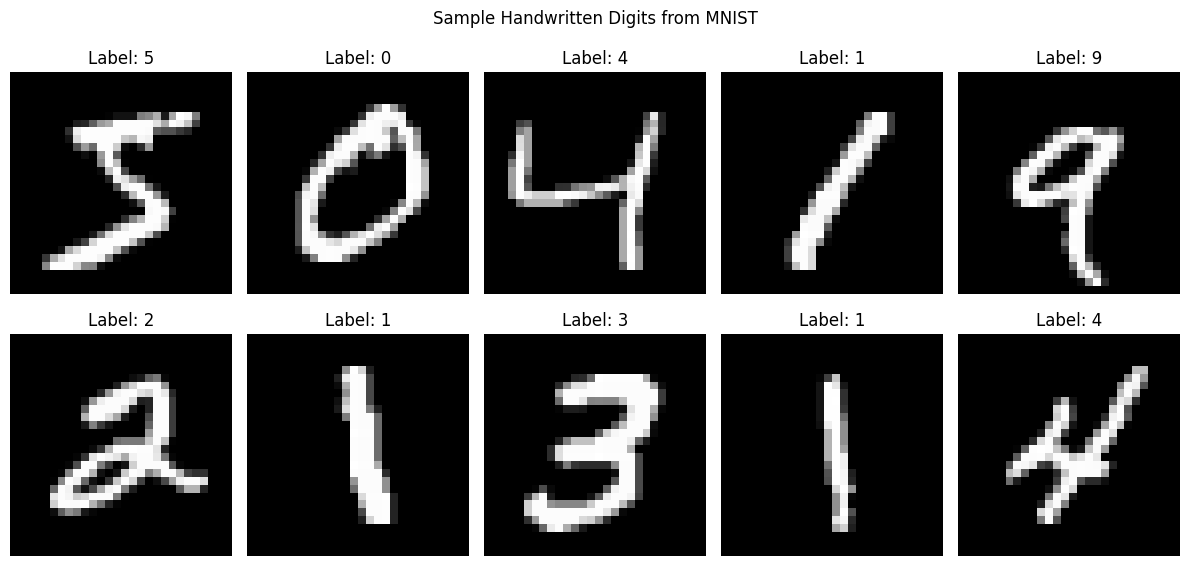

In [5]:

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axes[row, col].set_title(f'Label: {y_train[i]}')
    axes[row, col].axis('off')
plt.suptitle('Sample Handwritten Digits from MNIST')
plt.tight_layout()
plt.show()


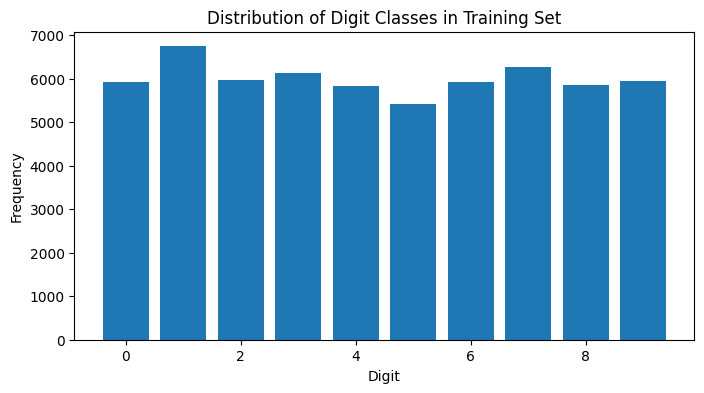

In [8]:
# Class distribution analysis
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(8, 4))
plt.bar(unique, counts)
plt.title('Distribution of Digit Classes in Training Set')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.show()


Text(0, 0.5, 'Frequency')

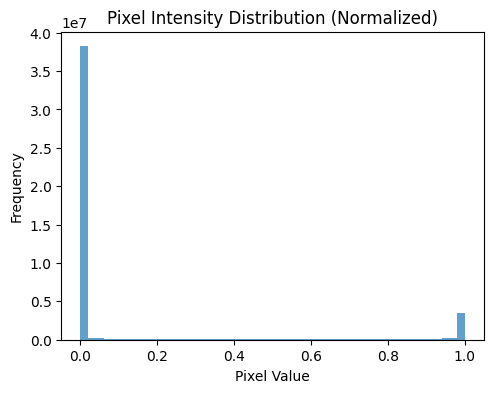

In [9]:

# Pixel intensity analysis
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(x_train.flatten(), bins=50, alpha=0.7)
plt.title('Pixel Intensity Distribution (Normalized)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')


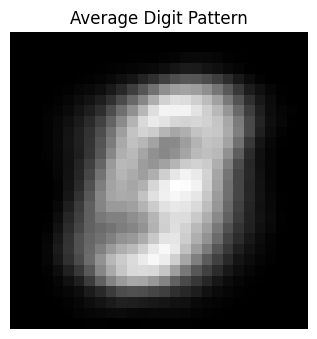

In [10]:

plt.subplot(1, 2, 2)
avg_digit = np.mean(x_train[:1000], axis=0).reshape(28, 28)
plt.imshow(avg_digit, cmap='gray')
plt.title('Average Digit Pattern')
plt.axis('off')
plt.tight_layout()
plt.show()


**# Define CNN architecture**

In [11]:

model = keras.Sequential([
    # First convolutional block
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),

    # Second convolutional block
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    # Third convolutional block
    keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
model.summary()

# Count trainable parameters
total_params = model.count_params()
print(f"Total trainable parameters: {total_params:,}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Total trainable parameters: 93,322


In [12]:
# Split validation data from training set
from sklearn.model_selection import train_test_split
x_train_split, x_val, y_train_split, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Training with validation monitoring
history = model.fit(
    x_train_split, y_train_split,
    epochs=10,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=1
)

# Model evaluation on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")




Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 122ms/step - accuracy: 0.7206 - loss: 0.8598 - val_accuracy: 0.9726 - val_loss: 0.0900
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 74s 102ms/step - accuracy: 0.9549 - loss: 0.1551 - val_accuracy: 0.9840 - val_loss: 0.0517
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 93ms/step - accuracy: 0.9705 - loss: 0.1044 - val_accuracy: 0.9855 - val_loss: 0.0484
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.9767 - loss: 0.0778 - val_accuracy: 0.9866 - val_loss: 0.0430
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 102ms/step - accuracy: 0.9816 - loss: 0.0646 - val_accuracy: 0.9897 - val_loss: 0.0373
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 97ms/step - accuracy: 0.9842 - loss: 0.0550 - val_accuracy: 0.9888 - val_loss: 0.0376
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9864 - loss: 0.0449 - val_accuracy: 0.9911 - val_loss: 0.0319
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9882 - loss: 0.0407

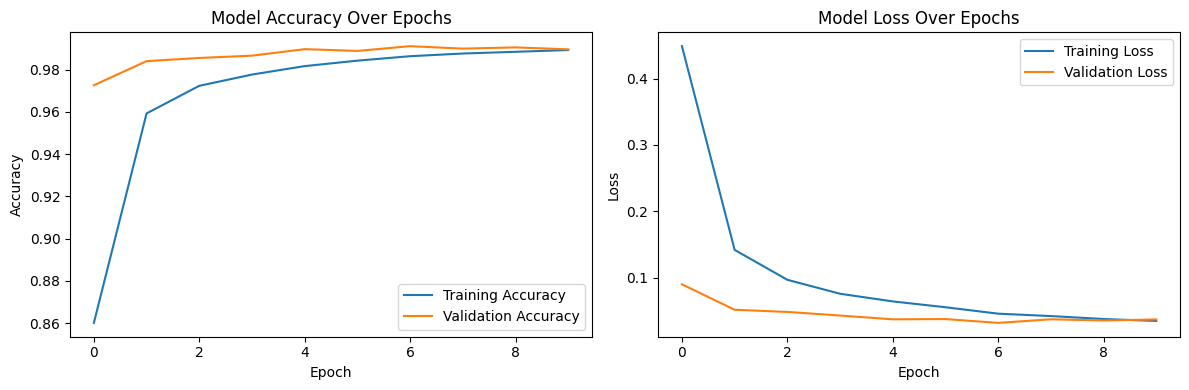

In [15]:
# Validation metrics visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


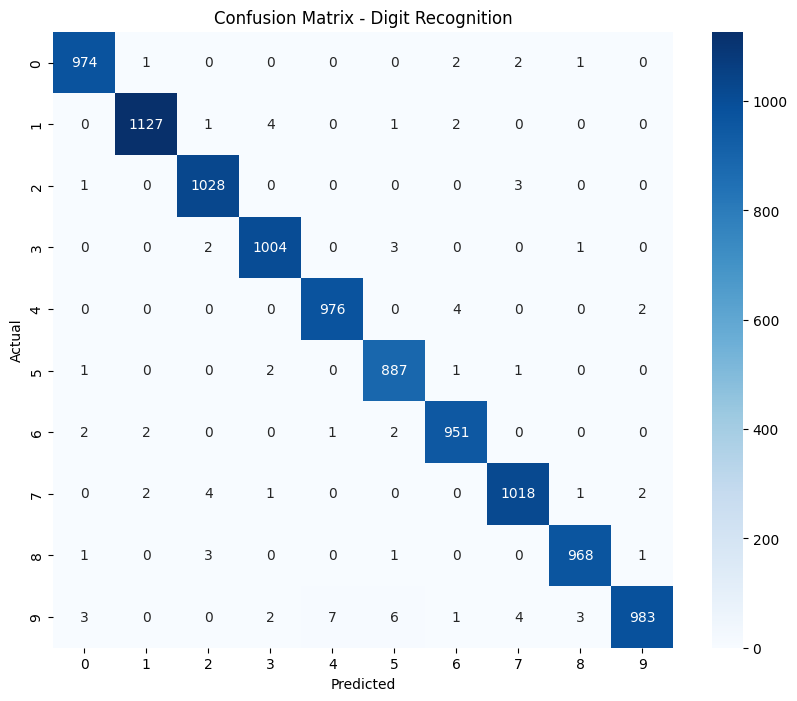

In [16]:
# Cross-validation check
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predictions on test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Digit Recognition')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [17]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [18]:
# Performance analysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("=== MODEL PERFORMANCE METRICS ===")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Prediction examples
def predict_and_display(indices):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i, idx in enumerate(indices):
        row = i // 5
        col = i % 5

        # Get prediction
        prediction = model.predict(x_test[idx:idx+1])
        predicted_digit = np.argmax(prediction)
        confidence = np.max(prediction) * 100

        # Display image
        axes[row, col].imshow(x_test[idx].reshape(28, 28), cmap='gray')
        axes[row, col].set_title(f'True: {y_test[idx]}, Pred: {predicted_digit}\nConf: {confidence:.1f}%')
        axes[row, col].axis('off')

    plt.suptitle('Sample Predictions with Confidence Scores')
    plt.tight_layout()
    plt.show()



=== MODEL PERFORMANCE METRICS ===
Accuracy: 0.9916 (99.16%)
Precision: 0.9916
Recall: 0.9916
F1-Score: 0.9916


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


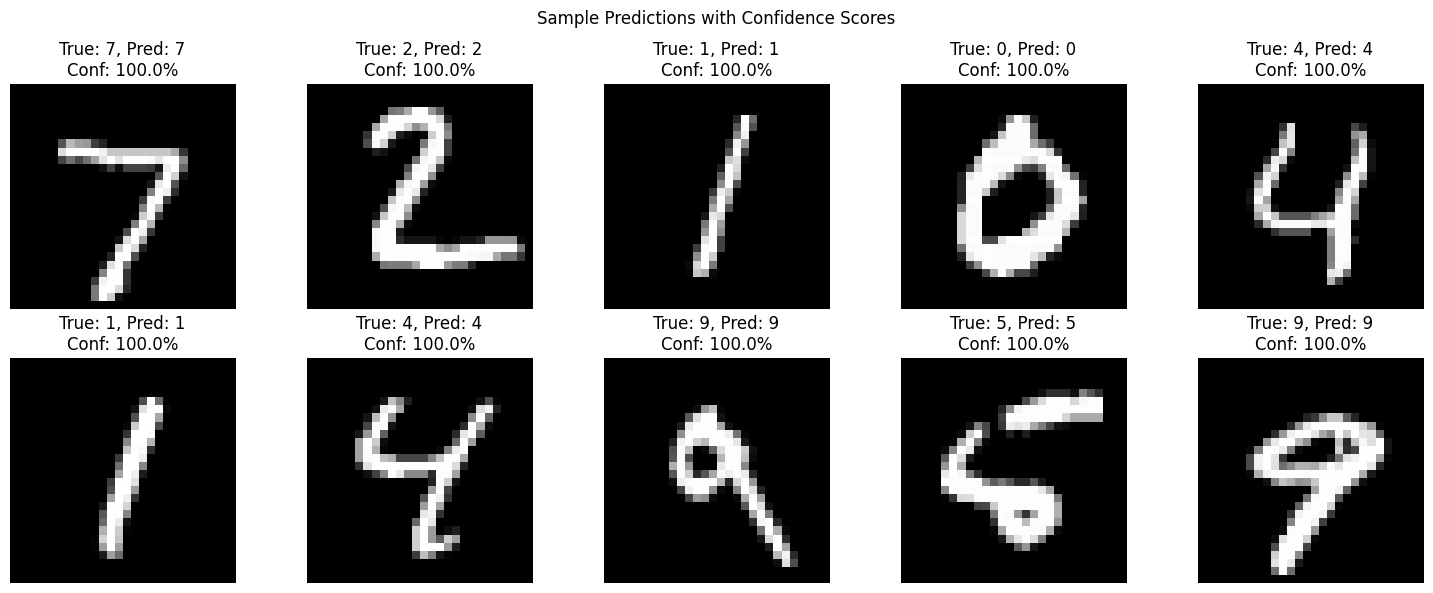


Total incorrect predictions: 84
Error rate: 0.84%

Misclassified Examples:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


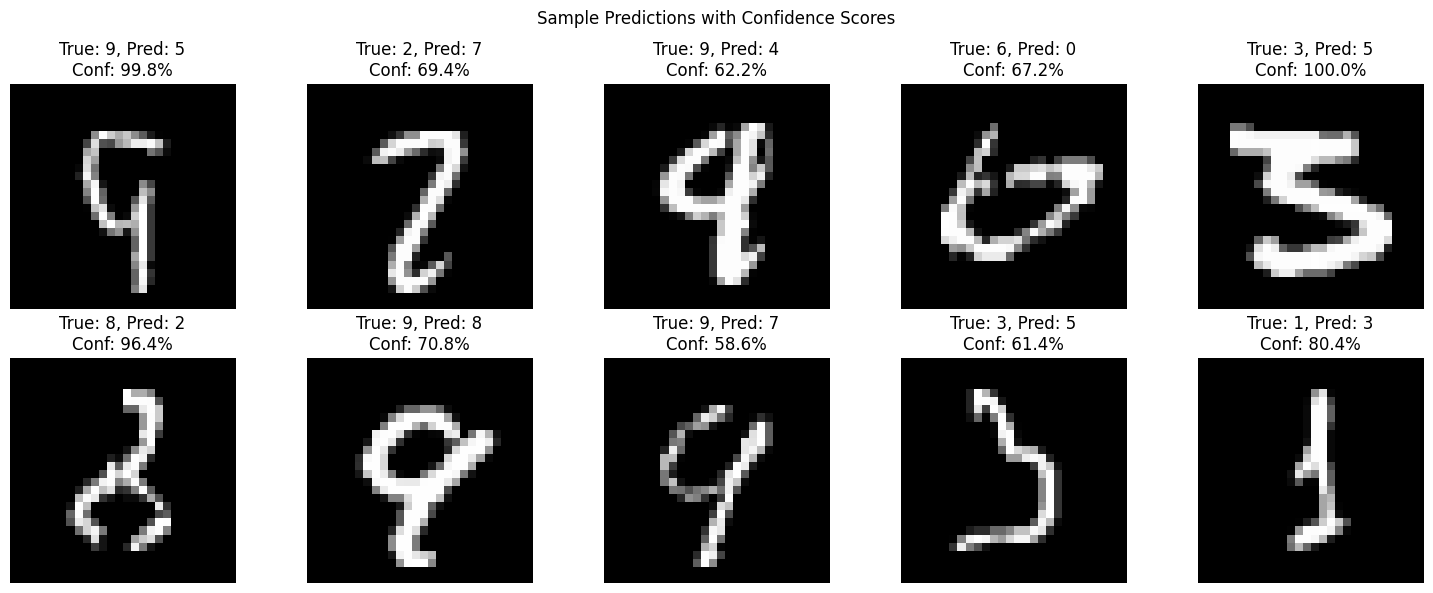

In [19]:
# Show predictions for first 10 test samples
predict_and_display(range(10))

# Error analysis
incorrect_indices = np.where(y_pred_classes != y_test)[0]
print(f"\nTotal incorrect predictions: {len(incorrect_indices)}")
print(f"Error rate: {len(incorrect_indices)/len(y_test)*100:.2f}%")

# Show some misclassified examples
if len(incorrect_indices) > 0:
    print("\nMisclassified Examples:")
    predict_and_display(incorrect_indices[:10])
